# **Lab 2: Root Finding & Optimization**

#**Error Calculation**

**Error Caclulation Functions**

In [13]:
# true error

def true_error(true_value, approximate_value):
    true_error = true_value - approximate_value

    return true_error


# absolute true error

def absolute_true_error(true_value, approximate_value):
    absolute_true_error = abs(true_value - approximate_value)

    return absolute_true_error


# relative error

def relative_error(true_value, approximate_value):
    relative_error = (true_value - approximate_value) / true_value

    return relative_error


# absolute relative error

def absolute_relative_error(true_value, approximate_value):
    absolute_relative_error = abs((true_value - approximate_value) / true_value)

    return absolute_relative_error


# percentage relative error

def percentage_relative_error(true_value, approximate_value):
    relative_percentage_error = ((true_value - approximate_value) / true_value) * 100

    return relative_percentage_error


# absolute percentage relative error

def absolute_percentage_relative_error(true_value, approximate_value):
    absolute_percentage_relative_error = abs(((true_value - approximate_value) / true_value) * 100)

    return absolute_percentage_relative_error


# absolute approximate error

def absolute_approximate_error(new_approximation, previous_approximation):
    approximate_error = abs(((new_approximation - previous_approximation) / new_approximation))

    return approximate_error


# absolute percentage approximate error

def absolute_percentage_approximate_error(new_approximation, previous_approximation):
    approximate_error = abs(((new_approximation - previous_approximation) / new_approximation) * 100)

    return approximate_error

**Error Caclulation Test**

In [14]:
true_value = 10

approximate_value = 9.5

previous_approximation = 9.5

current_approximation = 10

# true error

true_error_output = true_error(true_value, approximate_value)

print('True Error: {0}'.format(true_error_output))

# absolute true error

absolute_true_error_output = absolute_true_error(true_value, approximate_value)

print('Absolute True Error: {0}'.format(absolute_true_error_output))

# relative error

relative_error_output = relative_error(true_value, approximate_value)

print('Relative Error: {0}'.format(relative_error_output))

# absolute relative error

absolute_relative_error_output = absolute_relative_error(true_value, approximate_value)

print('Absolute Relative Error: {0}'.format(absolute_relative_error_output))

# percentage relative error

percentage_relative_error_output = percentage_relative_error(true_value, approximate_value)

print('Percentage Relative Error: {0}%'.format(percentage_relative_error_output))

# absolute percentage relative error

absolute_percentage_relative_error_output = absolute_percentage_relative_error(true_value, approximate_value)

print('Absolute Percentage Relative Error: {0}%'.format(absolute_percentage_relative_error_output))

# absolute approximate error

absolute_approximate_error_output = absolute_approximate_error(current_approximation, previous_approximation)

print('Absolute Approximate Error: {0}'.format(absolute_approximate_error_output))

# absolute percentage approximate error

absolute_percentage_approximate_error_output = absolute_approximate_error(current_approximation, previous_approximation)

print('Absolute Percentage Approximate Error: {0}%'.format(absolute_percentage_approximate_error_output))

True Error: 0.5
Absolute True Error: 0.5
Relative Error: 0.05
Absolute Relative Error: 0.05
Percentage Relative Error: 5.0%
Absolute Percentage Relative Error: 5.0%
Absolute Approximate Error: 0.05
Absolute Percentage Approximate Error: 0.05%


# **Root Finding Methods**

In [15]:
# imports

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
# function

def f(x):

  return 4.15 * x**3 - 16 * x**2 + 8

def f_prime(x):

  return 4.15 * 3 * x**2 - 16 * 2 * x

def f_prime_prime(x):

  return 4.15 * 3 * 2 * x - 16 * 2

**1. Graphical Method**

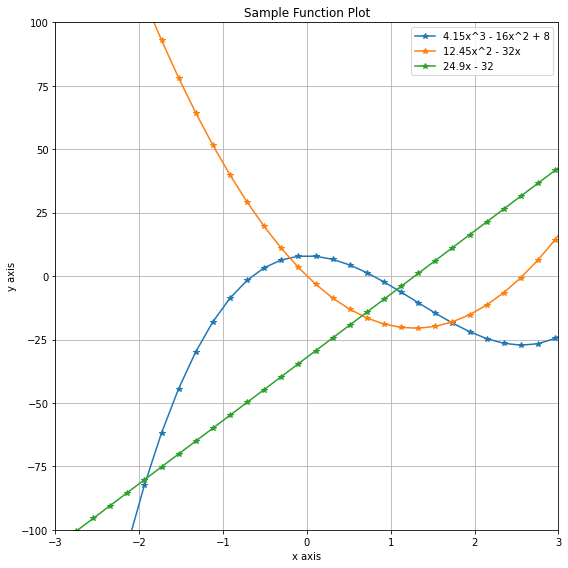

In [17]:
x = np.linspace(-5, 5, 50)

y = f(x)

y_prime = f_prime(x)

y_prime_prime = f_prime_prime(x)

fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Sample Function Plot')

ax.plot(x,
        y,
        label='4.15x^3 - 16x^2 + 8',
        marker='*')

ax.plot(x,
        y_prime,
        label='12.45x^2 - 32x',
        marker='*')

ax.plot(x,
        y_prime_prime,
        label='24.9x - 32',
        marker='*')

ax.set_xlim(-3, 3)

ax.set_ylim(-100, 100)

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

Estimated root for the above plot is around -0.7 and 0.8

**Bracketing Methods**

2. **Incremental Method**

In [18]:
def incremental_search(x_previous, h, error_threshold, precision, display_x_values):
    absolute_percentage_relative_error_output = 100

    previous_root = None

    current_root = None

    step = 1

    roots = []

    while True:

        x_current = round(x_previous + h, precision)

        f_previous = round(f(x_previous), precision)

        f_current = round(f(x_current), precision)

        if display_x_values:
            print(
                'Step: {0:3} - Previous x Value: {1:10}, Previous y Value: {2:10}, Current x Value:{3:10}, Current y Value: {4:10}'.format(
                    step,
                    x_previous,
                    f_previous,
                    x_current,
                    f_current))
        if f_previous * f_current < 0:

            current_root = round((x_previous + x_current) / 2, precision)

            if previous_root != None:
                absolute_percentage_relative_error_output = round(absolute_percentage_relative_error(current_root,
                                                                                                     previous_root),
                                                                  precision)

                print(
                    'Step: {0:3} - Current Root: {1:10}, Prevous Root: {2:10}, Absolute Percentage Relative Error: {3:5.2f}%'.format(
                        step,
                        current_root,
                        previous_root,
                        absolute_percentage_relative_error_output))

            roots.append([current_root, absolute_percentage_relative_error_output])

            if absolute_percentage_relative_error_output <= error_threshold:
                break

            previous_root = current_root

            h = round(h / 10, precision)

        else:

            x_previous = x_current

        step = step + 1

    return roots


roots = incremental_search(0, 0.1, 0.5, 8, True)

print(roots)

Step:   1 - Previous x Value:          0, Previous y Value:        8.0, Current x Value:       0.1, Current y Value:    7.84415
Step:   2 - Previous x Value:        0.1, Previous y Value:    7.84415, Current x Value:       0.2, Current y Value:     7.3932
Step:   3 - Previous x Value:        0.2, Previous y Value:     7.3932, Current x Value:       0.3, Current y Value:    6.67205
Step:   4 - Previous x Value:        0.3, Previous y Value:    6.67205, Current x Value:       0.4, Current y Value:     5.7056
Step:   5 - Previous x Value:        0.4, Previous y Value:     5.7056, Current x Value:       0.5, Current y Value:    4.51875
Step:   6 - Previous x Value:        0.5, Previous y Value:    4.51875, Current x Value:       0.6, Current y Value:     3.1364
Step:   7 - Previous x Value:        0.6, Previous y Value:     3.1364, Current x Value:       0.7, Current y Value:    1.58345
Step:   8 - Previous x Value:        0.7, Previous y Value:    1.58345, Current x Value:       0.8, Curr

**Incremental Method Plot**

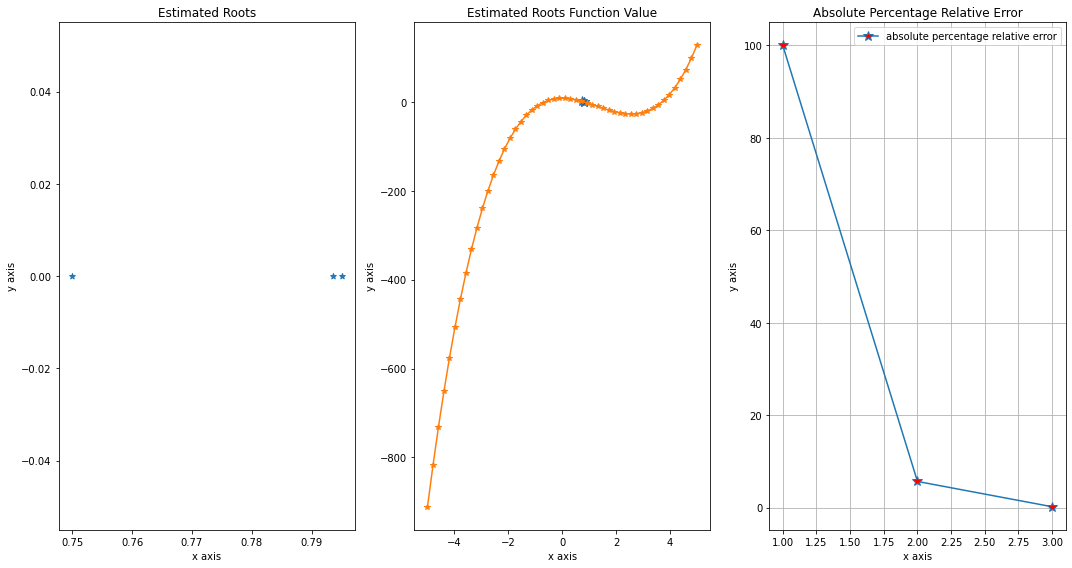

In [19]:
roots_np = np.array(roots)

roots_x = roots_np[:, 0]

roots_y = f(roots_x)

error = roots_np[:, 1]

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(fig_width, fig_height))

ax[0].scatter(roots_x,
              np.full(len(roots_x), 0),
              label='estimated roots',
              marker='*')

ax[0].set_xlabel('x axis')

ax[0].set_ylabel('y axis')

ax[0].set_title('Estimated Roots')

ax[1].plot(roots_x,
           roots_y,
           label='Estimated Roots Function Value',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

ax[1].set_xlabel('x axis')

ax[1].set_ylabel('y axis')

ax[1].set_title('Estimated Roots Function Value')

x = np.linspace(-5, 5, 50)

y = f(x)

ax[1].plot(x,
           y,
           label='4.15x^3 - 16x^2 + 8',
           marker='*')

ax[2].plot(np.arange(1, len(roots) + 1),
           error,
           label='absolute percentage relative error',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

ax[2].set_xlabel('x axis')

ax[2].set_ylabel('y axis')

ax[2].set_title('Absolute Percentage Relative Error')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

3. **Bisection Method**

In [20]:
def bisection(x_l, x_u, error_threshold, precision, display_x_values):
    previous_root = None

    step = 1

    absolute_percentage_relative_error_output = 100

    roots = []

    while True:

        current_root = round((x_l + x_u) / 2, precision)

        f_l = round(f(x_l), precision)

        f_u = round(f(x_u), precision)

        f_root = round(f(current_root), precision)

        if display_x_values:
            print(
                'Step: {0:3} - Lower Boundary x Value: {1:10}, Lower Boundary y Value: {2:10}, Upper Boundary x Value:{3:10}, Upper Boundary y Value: {4:10}'.format(
                    step,
                    x_l,
                    f_l,
                    x_u,
                    f_u))

        if f_l * f_root < 0:

            x_u = current_root

        elif f_root * f_u < 0:

            x_l = current_root

        elif f_u * f_root == 0:

            print('Root Found: {0}'.format(current_root))

        if previous_root != None:
            absolute_percentage_relative_error_output = round(absolute_percentage_relative_error(current_root,
                                                                                                 previous_root),
                                                              precision)

            print(
                'Step: {0:3} - Current Root: {1:10}, Prevous Root: {2:10}, Absolute Percentage Relative Error: {3:5.2f}%'.format(
                    step,
                    current_root,
                    previous_root,
                    absolute_percentage_relative_error_output))

        roots.append([current_root, absolute_percentage_relative_error_output])

        if absolute_percentage_relative_error_output <= error_threshold:
            break

        previous_root = current_root

        step = step + 1

    return roots


roots = bisection(0.2, 0.8, .5, 8, True)

print(roots)

Step:   1 - Lower Boundary x Value:        0.2, Lower Boundary y Value:     7.3932, Upper Boundary x Value:       0.8, Upper Boundary y Value:    -0.1152
Step:   2 - Lower Boundary x Value:        0.5, Lower Boundary y Value:    4.51875, Upper Boundary x Value:       0.8, Upper Boundary y Value:    -0.1152
Step:   2 - Current Root:       0.65, Prevous Root:        0.5, Absolute Percentage Relative Error: 23.08%
Step:   3 - Lower Boundary x Value:       0.65, Lower Boundary y Value: 2.37969375, Upper Boundary x Value:       0.8, Upper Boundary y Value:    -0.1152
Step:   3 - Current Root:      0.725, Prevous Root:       0.65, Absolute Percentage Relative Error: 10.34%
Step:   4 - Lower Boundary x Value:      0.725, Lower Boundary y Value: 1.17147422, Upper Boundary x Value:       0.8, Upper Boundary y Value:    -0.1152
Step:   4 - Current Root:     0.7625, Prevous Root:      0.725, Absolute Percentage Relative Error:  4.92%
Step:   5 - Lower Boundary x Value:     0.7625, Lower Boundary 

**Bisection Method Plot**

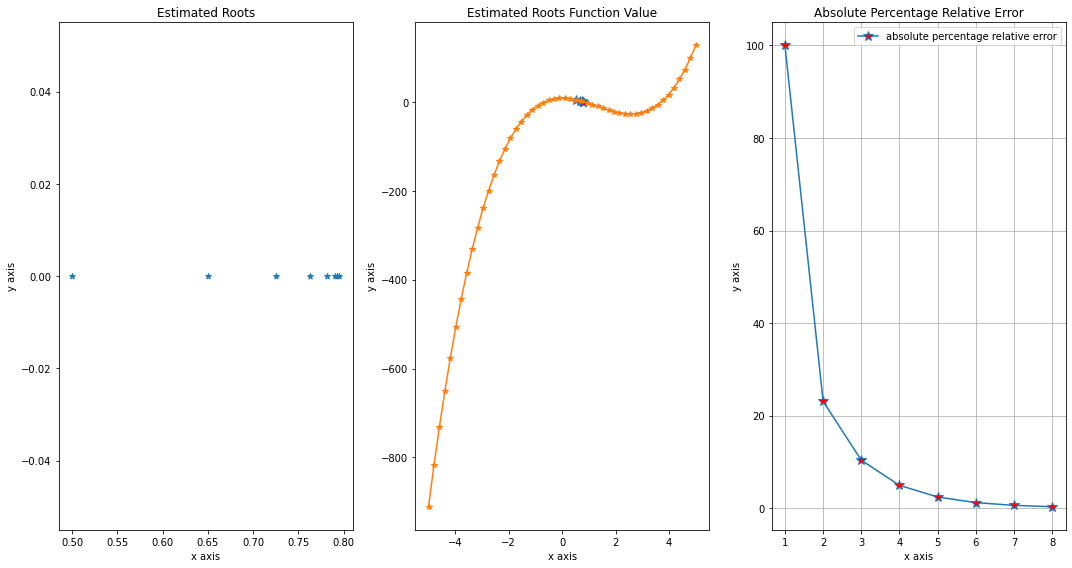

In [21]:
roots_np = np.array(roots)

roots_x = roots_np[:, 0]

roots_y = f(roots_x)

error = roots_np[:, 1]

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(fig_width, fig_height))

ax[0].scatter(roots_x,
              np.full(len(roots_x), 0),
              label='estimated roots',
              marker='*')

ax[0].set_xlabel('x axis')

ax[0].set_ylabel('y axis')

ax[0].set_title('Estimated Roots')

ax[1].plot(roots_x,
           roots_y,
           label='Estimated Roots Function Value',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

ax[1].set_xlabel('x axis')

ax[1].set_ylabel('y axis')

ax[1].set_title('Estimated Roots Function Value')

x = np.linspace(-5, 5, 50)

y = f(x)

ax[1].plot(x,
           y,
           label='4.15x^3 - 16x^2 + 8',
           marker='*')

ax[2].plot(np.arange(1, len(roots) + 1),
           error,
           label='absolute percentage relative error',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

ax[2].set_xlabel('x axis')

ax[2].set_ylabel('y axis')

ax[2].set_title('Absolute Percentage Relative Error')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

**Open Methods**

4. **Secant Method**

In [22]:
def secant(previous_previous_root, previous_root, error_threshold, precision, display_x_values):
    step = 1

    absolute_percentage_relative_error_output = 100

    roots = []

    while True:

        f_previous_previous = round(f(previous_previous_root), precision)

        f_previous = round(f(previous_root), precision)

        current_root = round(previous_root -
                             ((f_previous * (previous_root - previous_previous_root)) / (
                                     f_previous - f_previous_previous)),
                             precision)

        f_current = round(f(current_root), precision)

        if display_x_values:
            print('Step: {0:3} - \
        Previous Previous Root x Value: {1:10}, Previous Previous Root y Value: {2:10}, \
        Previous Root x Value:{3:10}, Previous Root y Value: {4:10}\
        Current Root x Value:{5:10}, Current Root y Value: {6:10}'.format(step,
                                                                          previous_previous_root,
                                                                          f_previous_previous,
                                                                          previous_root,
                                                                          f_previous,
                                                                          current_root,
                                                                          f_current))

        if previous_root != None:
            absolute_percentage_relative_error_output = round(absolute_percentage_relative_error(current_root,
                                                                                                 previous_root),
                                                              precision)

            print(
                'Step: {0:3} - Current Root: {1:10}, Prevous Root: {2:10}, Absolute Percentage Relative Error: {3:5.2f}%'.format(
                    step,
                    current_root,
                    previous_root,
                    absolute_percentage_relative_error_output))

        roots.append([current_root, absolute_percentage_relative_error_output])

        if absolute_percentage_relative_error_output <= error_threshold:
            break

        previous_previous_root = previous_root

        previous_root = current_root

        step = step + 1

    return roots


roots = secant(0, 1, .5, 8, False)

print(roots)

Step:   1 - Current Root: 0.67510549, Prevous Root:          1, Absolute Percentage Relative Error: 48.12%
Step:   2 - Current Root: 0.78561762, Prevous Root: 0.67510549, Absolute Percentage Relative Error: 14.07%
Step:   3 - Current Root:  0.7938202, Prevous Root: 0.78561762, Absolute Percentage Relative Error:  1.03%
Step:   4 - Current Root: 0.79345065, Prevous Root:  0.7938202, Absolute Percentage Relative Error:  0.05%
[[0.67510549, 48.12499895], [0.78561762, 14.06691082], [0.7938202, 1.03330452], [0.79345065, 0.04657505]]


**Secant Method Plot**

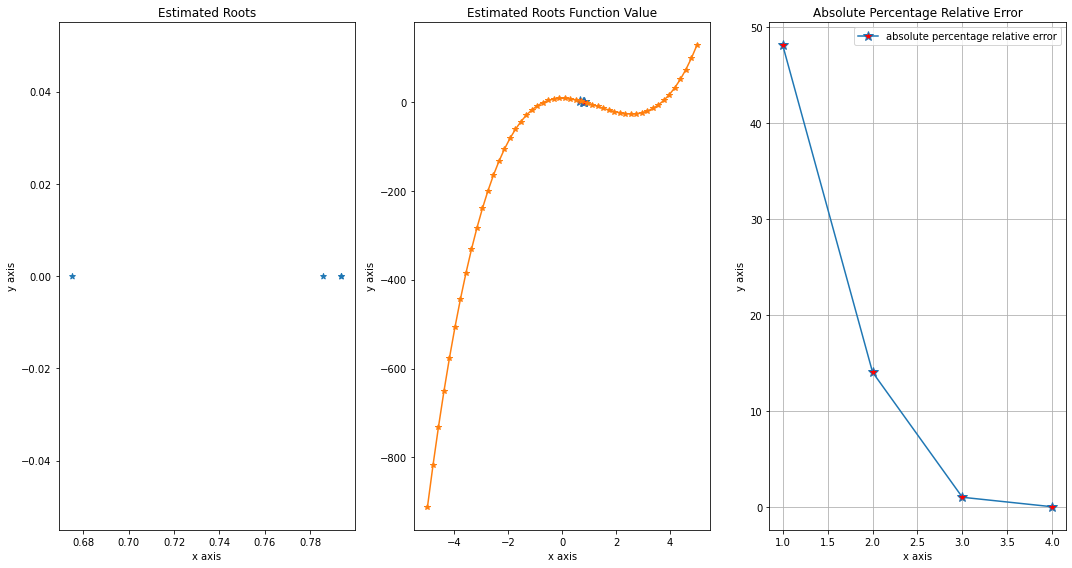

In [23]:
roots_np = np.array(roots)

roots_x = roots_np[:, 0]

roots_y = f(roots_x)

error = roots_np[:, 1]

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(fig_width, fig_height))

ax[0].scatter(roots_x,
              np.full(len(roots_x), 0),
              label='estimated roots',
              marker='*')

ax[0].set_xlabel('x axis')

ax[0].set_ylabel('y axis')

ax[0].set_title('Estimated Roots')

ax[1].plot(roots_x,
           roots_y,
           label='Estimated Roots Function Value',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

ax[1].set_xlabel('x axis')

ax[1].set_ylabel('y axis')

ax[1].set_title('Estimated Roots Function Value')

ax[2].plot(np.arange(1, len(roots) + 1),
           error,
           label='absolute percentage relative error',
           marker='*',
           markersize=10,
           MarkerFaceColor='r')

x = np.linspace(-5, 5, 50)

y = f(x)

ax[1].plot(x,
           y,
           label='4.15x^3 - 16x^2 + 8',
           marker='*')

ax[2].set_xlabel('x axis')

ax[2].set_ylabel('y axis')

ax[2].set_title('Absolute Percentage Relative Error')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

# **Problems**

Q1. Write the program to find out theroot of the function $𝑓(𝑥) = 𝑒^{𝑥} − 3𝑥$ using Newton-Raphson method.

1. Compute $𝑓'(𝑥)$ and $𝑓''(𝑥)$ analytically and write functions for them. Moreover plot them using the functions.

In [24]:
# write code for functions here 

In [25]:
# write code for plot here

2. Select initial guess of the root and put it in previous_root.


In [26]:
# write code here

3. Implement the Newton-Raphson method with error (error threshold = .001%) calculation using it's update rule as $𝑥_{current} = 𝑥_{previous} – \frac{𝑓(𝑥_{previous})}{𝑓'(𝑥_{previous})}$

In [27]:
# write code here

4. Plot the function and the estimated roots along with the error.

In [28]:
# write code here

Q2. Write a program to find the (local) maxima point of the function $ 𝑓(𝑥) = 2sin(𝑥) − \frac{𝑥^{2}}{10}$

Using Newton’s method and Gradient Ascent/Descent. For both methods implement the steps below

1. Compute $𝑓'(𝑥)$ analytically

In [29]:
# write code for function here

In [30]:
# write code for plot here

2. Select initial guess of the maxima.

In [31]:
# write code here

3. Write the Update rule for Newton's Method

* $x_{i+1} = ? $ 

Complete the equation

4. Solve using Newton's Method.

In [32]:
# write code here

5. Plot the estimated maxima in the graph and Compute the approximate percentage relative error at each step.

In [33]:
# write code here

6. Write the Update rule for Gradient Ascent/Descent

* $x_{i+1} = ?$

Complete the equation

7. Solve using Gradient Ascent/Descent

In [34]:
# write code here

8. Plot the estimated maxima in the graph and Compute the approximate percentage relative error at each step.

In [35]:
# write code here